# Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation 
 <br>


In [ ]:
# The import below is needed so that we can display full output in Jupyter, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import library
import numpy as np
import matplotlib.pyplot as plt
import math

## Intuitive understanding for MLE and MAP 
**Related article: https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-and-maximum-a-posteriori-estimation-d7c318f9d22d** <br /><br />Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation are method of estimating parameters of statistical models.
<br /><br />
For example, let's talk about a baseball match between LA Dodgers and NY Yankees. 
Dodgers won 30 matches out of 38 matches in this season. 
<br /><br />How could we guess the probability for winning a match against Yankees? 
<br /><br />With MLE, it's simply a sample mean and sample variance for this case, which are parameters for Gaussian distribution to the data. If we take the derivative of the Gaussian function with respect to the mean and variance, and maximizing it (i.e. setting the derivative to zero), what we get is functions that are calculating sample mean and sample variance. Thus, the result will be like this: 30/38 * 100 = 78.9%
<br /><br />
MLE is powerful when you have enough data; however, it doesn’t work well when observed data size is small. With MAP, let's assume that we have a prior knowledge that Dodgers’s winning percentage against Yankees for the past few seasons were around 50%, which called prior probability.
Then, without the data from this season, we already have somewhat idea of potential value of θ. Based (only) on the prior knowledge, the value of θ is most likely to be 0.5, and less likely to be 0 or 1. In this case, the prior is not uniform and it keeps changing depending on the parameters, $\alpha$ and $\beta$, of Beta distribution.
<br /><br />
In conclusion, MLE is a special case of MAP, where the prior is uniform.

## Bernoulli distribution
Suppose we flip a coin $n$ times and count the number of heads, $\alpha_H$, and the number of tails, $\alpha_T$. Note that $\alpha_H + \alpha_T = n$. Let $\theta$ be the probability of the coin in a single flip to give head, assumed to be constant during our experiment. The probability of observing $\alpha_H$ heads and $\alpha_T$ tails, given $\theta$, is

$$P\left( D = (\alpha_H, \alpha_T) | \theta \right) = \theta^{\alpha_H} (1-\theta)^{\alpha_T}$$

Now, in our experiment we only observe $\alpha_H$ and $\alpha_T$, but we do not observe $\theta$. We can estimate the value of $\theta$ from the result of our observation.

__MLE:__
$$\hat{\theta}_{\rm MLE} = \frac{\alpha_H}{\alpha_H + \alpha_T}$$

Suppose we have an information that tells us that the value of $\theta$ is, say, $\theta_{\rm PRIOR}$. We can combine this prior knowledge with our observation to get estimate. 

__MAP estimate:__
$$\hat{\theta}_{\rm MAP} = \frac{(\alpha_H + \gamma_H)}{(\alpha_H + \gamma_H) + (\alpha_T + \gamma_T)}$$

Here $\gamma_H$ and $\gamma_T$ are values that we chose such that $\gamma_H / (\gamma_H + \gamma_T) = \alpha_{\rm PRIOR}$. Their values depend on how much our confidence is on the prior knowledge. The more our confidence is, the larger $\gamma_H$ and $\gamma_T$ are. For example, suppose $\theta_{\rm PRIOR} = 0.6$. We can choose $\gamma_H = 6$ and $\gamma_T = 4$ (low confidence), or $\gamma_H = 60$ and $\gamma_T = 40$ (higher confidence).

In [ ]:
# for a single coin flip:
def coin_flip(p):
    r = np.random.rand()  # generate a random number in [0,1)
    if r < p :   # head
        return 1
    else :       # tail
        return 0

__MLE:__
$$\hat{\theta}_{\rm MLE} = \frac{\alpha_H}{\alpha_H + \alpha_T}$$

Suppose we have an information that tells us that the value of $\theta$ is, say, $\theta_{\rm PRIOR}$. We can combine this prior knowledge with our observation to get estimate.

In [ ]:
# set the constants
N = 250       # max number of flips
theta = 0.5  # the real value of theta

# Lists to record the observation/estimates
MLE = []
# initiate counters
a_H = 0
a_T = 0
for j in range(N):
    a_H = a_H + coin_flip(theta)
    a_T = (j+1) - a_H    # (j+1) is the number of flips in that iteration 
    mle = a_H/(a_H + a_T)
    #HList.append(a_H)
    MLE.append(mle)
    

# for checking:
#print(HList)  # This should be monotonous
print("Mean for MLE:",sum(MLE)/len(MLE))
#print(MAP)
print(MLE)

Mean for MLE: 0.5742449771791065
[0.0, 0.5, 0.6666666666666666, 0.75, 0.8, 0.8333333333333334, 0.8571428571428571, 0.875, 0.8888888888888888, 0.9, 0.9090909090909091, 0.8333333333333334, 0.8461538461538461, 0.8571428571428571, 0.8, 0.8125, 0.8235294117647058, 0.8333333333333334, 0.8421052631578947, 0.85, 0.8095238095238095, 0.7727272727272727, 0.7391304347826086, 0.75, 0.72, 0.7307692307692307, 0.7037037037037037, 0.7142857142857143, 0.6896551724137931, 0.6666666666666666, 0.6451612903225806, 0.65625, 0.6363636363636364, 0.6176470588235294, 0.6, 0.6111111111111112, 0.6216216216216216, 0.6052631578947368, 0.6153846153846154, 0.625, 0.6097560975609756, 0.5952380952380952, 0.5813953488372093, 0.5909090909090909, 0.6, 0.5869565217391305, 0.574468085106383, 0.5625, 0.5510204081632653, 0.56, 0.5490196078431373, 0.5576923076923077, 0.5471698113207547, 0.5555555555555556, 0.5636363636363636, 0.5714285714285714, 0.5614035087719298, 0.5517241379310345, 0.559322033898305, 0.55, 0.5409836065573771

__MAP estimate:__
$$\hat{\theta}_{\rm MAP} = \frac{(\alpha_H + \gamma_H)}{(\alpha_H + \gamma_H) + (\alpha_T + \gamma_T)}$$

Here $\gamma_H$ and $\gamma_T$ are values that we chose such that $\gamma_H / (\gamma_H + \gamma_T) = \alpha_{\rm PRIOR}$. Their values depend on how much our confidence is on the prior knowledge. The more our confidence is, the larger $\gamma_H$ and $\gamma_T$ are. For example, suppose $\theta_{\rm PRIOR} = 0.6$. We can choose $\gamma_H = 6$ and $\gamma_T = 4$ (low confidence), or $\gamma_H = 60$ and $\gamma_T = 40$ (higher confidence).

In [ ]:
# set the constants
N = 250       # max number of flips
theta = 0.5  # the real value of theta
g_H = 6     # assuming theta_PRIOR = 0.6
g_T = 4
HList = []    # for checking
MAP = []
# initiate counters
a_H = 0
a_T = 0
for j in range(N):
    a_H = a_H + coin_flip(theta)
    a_T = (j+1) - a_H    # (j+1) is the number of flips in that iteration 
    mape = (a_H + g_H)/((a_H + g_H) + (a_T + g_T))
    HList.append(a_H)
    MAP.append(mape)
#print("For checking:",HList)
print("Mean for MAP:",sum(MAP)/len(MAP))

Mean for MAP: 0.4429406767659845


In [ ]:
# Set the x (number of flips):
x = np.arange(1, N+1)
# The real theta line, for reference:
RLine = (theta, theta)
xx = (0, N+1)

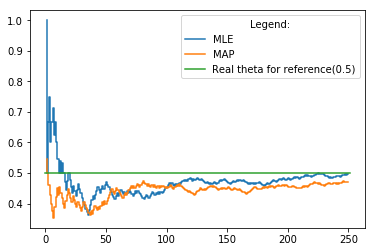

In [ ]:
plt.step(x,MLE, label='MLE')
plt.plot(x,MLE, 'C0o', alpha=0.001)

plt.step(x,MAP, where='mid', label='MAP')
plt.plot(x,MAP, 'C1o', alpha=0.001)

plt.step(xx, RLine, where='post', label='Real theta for reference(0.5)')
plt.plot(xx, RLine, 'C2o', alpha=0.001)

plt.legend(title='Legend:')
plt.show()



The plot above is similar to the ones in the reading (Mitchell), Figure 1. Note that due to the random nature of the experiment we will not get the exact same result if we repeat the experiment. Sometimes, the estimates might not even seem to converge to the reference line.  



## Univariate Normal Distribution:
**Related article: https://towardsdatascience.com/univariate-and-multivariate-gaussian-distribution-clear-understanding-with-visuals-5b85e53ea76**<br /><br />
The probability of getting $x$ drawn from a normal distribution $N(\mu, \sigma^2)$ is

$$f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2} $$

where $\mu$ is the mean, and $\sigma$ is the standard deviation.

Here, for simplicity let us assume that the real standard deviation, $\sigma$, is known. So we only need to estimate $\mu$. 

__MLE:__ 
$$\hat{\mu}_{\rm MLE} = \frac{1}{n} \sum_{j=1}^n x_j,$$
and 
\begin{equation}
\hat{\sigma}_{MLE} = \sqrt{\frac{1}{n}\sum_{i}^{n}(x_i - \mu)^2}
\end{equation}
but, we can use $\hat{\mu}_{MLE}$ instead of $\mu$. 

With prior $N(\mu_0, \sigma_m^2)$, <br>
__MAP estimate:__  
$$\hat{\mu}_{\rm MAP} = \frac{\sigma_m^2 \left(\sum_{j=1}^n x_j \right) + \sigma^2 \mu_0}{\sigma_m^2 n + \sigma^2}$$



In [ ]:
# set the constants
N = 250       # max number of draws
mu = 0.0      # the real value of mu
sigma = 1.0   # the real value of sigma
mu_0 = 1.0       # the prior mu
sigma_m = 2.0    # the prior sigma
# Lists to record the observation/estimates
MLE = []
MAP = []
MLE_sigma = []
# initiate the sum
sum_x = 0
list_x = []
for j in range(N):
    # For normal distribution or Gaussian distribution
    x = np.random.normal(mu, sigma)  # Note that we input sigma, not sigma^2 
    #(https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
    list_x.append(x)
    sum_x = sum_x + x
    n = j+1 # n
    mle = sum_x/n # MLE
    squared_sum = 0
    for x in list_x:
        squared_sum += (x - mle)**2
    mle_sigma = math.sqrt((1/(j+1))*squared_sum) #Sigma_MLE
    MLE.append(mle)
    MLE_sigma.append(mle_sigma)
    
# For checking:
print("For MLE:",MLE)
print("For MLE sigma:",MLE_sigma)



For MLE: [1.0391005401660223, -0.03872466323355783, 0.09554194216121152, -0.23502782056356009, -0.19034082744217656, -0.08178890704435414, -0.05771962190065875, 0.02016843672542415, 0.055211767884641244, 0.09321824618730427, 0.08592047070736444, 0.2279784520331468, 0.21434506459014147, 0.23526171581526426, 0.27279682548440526, 0.21182586196772868, 0.27335292328960714, 0.25902380702527084, 0.2096907084432213, 0.20671317756301497, 0.13456674366124505, 0.08688077790307616, 0.09307663103750076, 0.12888069662533094, 0.16448216156079123, 0.10193744641722226, 0.1208246612523916, 0.07238212461246231, 0.07445008494220984, 0.10866931365677471, 0.08866779552367393, 0.07174923679304715, 0.08091226581052131, 0.0885654035774993, 0.07391040191637514, 0.05276047129282684, 0.08533844207880538, 0.08622926315221877, 0.08513442455425625, 0.09456492015275239, 0.12982035438541836, 0.11043465806734391, 0.10366918841479811, 0.09431877524383005, 0.10109912465136364, 0.12997877518987128, 0.08496882901179226, 0.

With prior $N(\mu_0, \sigma_m^2)$, <br>
__MAP estimate:__  
$$\hat{\mu}_{\rm MAP} = \frac{\sigma_m^2 \left(\sum_{j=1}^n x_j \right) + \sigma^2 \mu_0}{\sigma_m^2 n + \sigma^2}$$

In [ ]:
# set the constants
N = 250       # max number of draws
mu = 0.0      # the real value of mu
sigma = 1.0   # the real value of sigma
mu_0 = 1.0       # the prior mu
sigma_m = 2.0    # the prior sigma
# Lists to record the observation/estimates
MAP = []
for j in range(N):
    x = np.random.normal(mu, sigma)  # Note that we input sigma, not sigma^2 (see the API)
    list_x.append(x)
    sum_x = sum_x + x
    n = j+1
    mape = (sigma_m*sigma_m*sum_x + sigma*sigma*mu_0)/(sigma_m*sigma_m*n + sigma*sigma) # MAP
    MAP.append(mape)
# For checking:
print("For MAP:",MAP)


For MAP: [0.6976833619542612, 1.101624547933643, 0.33807264698869977, 0.40752405393572066, 0.415375318854993, 0.10515737571788587, 0.3958387174874417, 0.3342449230691121, 0.29546678767025386, 0.35574508409475997, 0.45596262374142377, 0.4620206707318673, 0.3079127330889313, 0.3173959351371653, 0.31945059724487923, 0.24670780463919903, 0.2723889637635525, 0.252970844945514, 0.21098953267689474, 0.20606097139882962, 0.1938123815161218, 0.20164742572490552, 0.13614546449054704, 0.10686298319768117, 0.11723498336118743, 0.1144417274024362, 0.08054966063434339, 0.0752466882940482, 0.062242852958120536, 0.041325431814302295, 0.052615404907621184, 0.03360004750058366, 0.015314046222652282, 0.0287010763442075, 0.004907514794606221, 0.06851186479383875, 0.08116677387292429, 0.09179717625588357, 0.11270872256141466, 0.04372602040097996, 0.056166009977643656, 0.058524808106419524, 0.06966512898953928, 0.06238756970515239, 0.08573598624549171, 0.08360500346469886, 0.09394754343089858, 0.13184218373

In [ ]:
# Set the x (number of flips):
x = np.arange(1, N+1)
# The real theta line, for reference:
RLine = (mu, mu)
xx = (0, N+1)

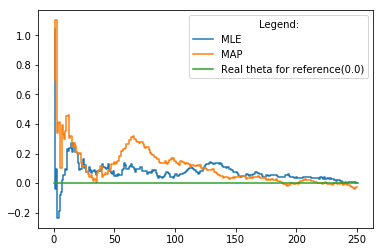

In [ ]:
plt.step(x,MLE, label='MLE')
plt.plot(x,MLE, 'C0o', alpha=0.001)

plt.step(x,MAP, where='mid', label='MAP')
plt.plot(x,MAP, 'C1o', alpha=0.001)

plt.step(xx, RLine, where='post', label='Real theta for reference(0.0)')
plt.plot(xx, RLine, 'C2o', alpha=0.001)

plt.legend(title='Legend:')
plt.show()

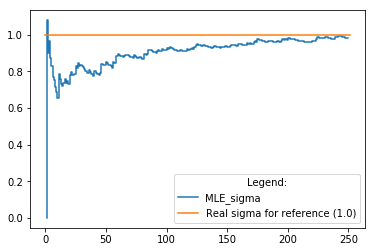

In [ ]:
plt.step(x, MLE_sigma, label='MLE_sigma')
plt.plot(x, MLE_sigma, 'C0o', alpha=0.001)
plt.step(xx, (sigma, sigma), where='post', label='Real sigma for reference (1.0)')
plt.plot(xx, (sigma, sigma), 'C1o', alpha=0.001)
plt.legend(title='Legend:')
plt.show()